# `onetick-py` in action

In [1]:
import onetick.py as otp

In [2]:
from datetime import datetime
otp.config['default_start_time'] = datetime(2003, 12, 1, 0, 0, 0)
otp.config['default_end_time'] = datetime(2003, 12, 4, 0, 0, 0)
otp.config['default_db'] = 'NYSE_TAQ'
otp.config['default_symbol'] = 'AAPL'
otp.config['tz'] = 'EST5EDT'

In [3]:
servers = otp.servers.RemoteTS(
    otp.LoadBalancing(
        'local-cloud-1.sol.onetick.com:10000',
        'local-cloud-2.sol.onetick.com:10000'
    )
)

s = otp.Session(otp.session.Config(locator=servers))

/usr/local/lib/python3.9/site-packages/onetick/py/session.py:927: UserWarning: ONE_TICK_CONFIG env variable has been set before a session, and in the session scope it is not related to the session config. If you want to make ONE_TICKC_CONFIG env variable be consistent with the session, then look at the override_env flag for the Session constructor
  warnings.warn(


# Retrieving Tick Data

In [83]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')

print(trd)

otp.run(trd, start=otp.dt(2023,4,20,9,30), end=otp.dt(2023,4,20,9,35), symbols=['SPY'])

,Time,EXCHANGE,COND,STOP_STOCK,SOURCE,TRF,TTE,TICKER,PRICE,DELETED_TIME,TICK_STATUS,SIZE,CORR,SEQ_NUM,TRADE_ID,PARTICIPANT_TIME,TRF_TIME,OMDSEQ
0,2023-04-20 09:30:00.000650240,Z,,N,C,,0,SPY,411.2100,1969-12-31 19:00:00,0,231,0,78367,52983525042744,2023-04-20 09:30:00.000331000,1969-12-31 19:00:00.000000000,0
1,2023-04-20 09:30:00.000656384,T,T,N,C,,0,SPY,411.2000,1969-12-31 19:00:00,0,100,0,78368,62879146921029,2023-04-20 09:30:00.000273283,1969-12-31 19:00:00.000000000,1
2,2023-04-20 09:30:00.002436608,K,,N,C,,0,SPY,411.2000,1969-12-31 19:00:00,0,400,0,78373,52983525173819,2023-04-20 09:30:00.002089000,1969-12-31 19:00:00.000000000,0
3,2023-04-20 09:30:00.002562816,Z,F I,N,C,,1,SPY,411.2100,1969-12-31 19:00:00,0,50,0,78374,52983525042745,2023-04-20 09:30:00.002325000,1969-12-31 19:00:00.000000000,1
4,2023-04-20 09:30:00.002568960,Z,F I,N,C,,1,SPY,411.2200,1969-12-31 19:00:00,0,50,0,78375,52983525042746,2023-04-20 09:30:00.002325000,1969-12-31 19:00:00.000000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,2023-04-20 09:34:59.781732352,P,F,N,C,,1,SPY,411.7400,1969-12-31 19:00:00,0,100,0,119251,52983525623877,2023-04-20 09:34:59.781707776,1969-12-31 19:00:00.000000000,0
17116,2023-04-20 09:34:59.781930752,K,F,N,C,,1,SPY,411.7400,1969-12-31 19:00:00,0,100,0,119252,52983525236544,2023-04-20 09:34:59.781680000,1969-12-31 19:00:00.000000000,1
17117,2023-04-20 09:34:59.892375040,Z,I,N,C,,0,SPY,411.7400,1969-12-31 19:00:00,0,40,0,119268,52983525106510,2023-04-20 09:34:59.892138000,1969-12-31 19:00:00.000000000,0
17118,2023-04-20 09:34:59.930526464,D,,N,C,T,0,SPY,411.7425,1969-12-31 19:00:00,0,200,0,119270,71675308169546,2023-04-20 09:34:59.780763000,2023-04-20 09:34:59.930170219,0


# Creating Bars
We create 10-minute bars (`bucket_interval=600` seconds) below.

In [84]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')
bars = trd.agg({'VOLUME': otp.agg.sum('SIZE'),
               'HIGH': otp.agg.max('PRICE'),
               'LOW': otp.agg.min('PRICE'),
               'OPEN': otp.agg.first('PRICE'),
                'COUNT': otp.agg.count(),
               'CLOSE': otp.agg.last('PRICE')},
               bucket_interval=600)

otp.run(bars, start=otp.dt(2023,5,15,9,30), end=otp.dt(2023,5,19,16), symbols=['AA'], apply_times_daily=True)

,Time,VOLUME,HIGH,LOW,OPEN,COUNT,CLOSE
0,2023-05-15 09:40:00,207413,35.8900,35.3600,35.5100,1572,35.8215
1,2023-05-15 09:50:00,84264,35.9000,35.7100,35.8201,1195,35.8850
2,2023-05-15 10:00:00,100976,36.1200,35.8900,35.8900,1064,36.0699
3,2023-05-15 10:10:00,101094,36.1864,35.9400,36.0550,1070,35.9400
4,2023-05-15 10:20:00,59723,36.0792,35.8400,35.9550,685,35.9300
...,...,...,...,...,...,...,...
190,2023-05-19 15:20:00,51321,36.1900,36.1200,36.1400,691,36.1900
191,2023-05-19 15:30:00,44589,36.1900,36.1100,36.1900,566,36.1296
192,2023-05-19 15:40:00,92224,36.1598,36.0600,36.1300,968,36.1500
193,2023-05-19 15:50:00,95021,36.2100,36.1009,36.1500,1264,36.1800


In [85]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')

trd, _ = trd[trd['COND'].str.match('^[^O6TUHILNRWZ47QMBCGPV]*$')]

bars = trd.agg({'VOLUME': otp.agg.sum('SIZE'),
               'HIGH': otp.agg.max('PRICE'),
               'LOW': otp.agg.min('PRICE'),
               'OPEN': otp.agg.first('PRICE'),
                'COUNT': otp.agg.count(),
               'CLOSE': otp.agg.last('PRICE')},
               bucket_interval=600)

otp.run(bars, start=otp.dt(2023,5,15,9,30), end=otp.dt(2023,5,19,16), symbols=['AA'], apply_times_daily=True)

,Time,VOLUME,HIGH,LOW,OPEN,COUNT,CLOSE
0,2023-05-15 09:40:00,100799,35.8900,35.3700,35.5050,519,35.8200
1,2023-05-15 09:50:00,61271,35.9000,35.7100,35.8201,280,35.8850
2,2023-05-15 10:00:00,83471,36.1200,35.8900,35.9000,293,36.0699
3,2023-05-15 10:10:00,83511,36.1864,35.9500,36.0550,324,35.9535
4,2023-05-15 10:20:00,50022,36.0121,35.8400,35.9550,262,35.9300
...,...,...,...,...,...,...,...
190,2023-05-19 15:20:00,38364,36.1900,36.1250,36.1400,211,36.1725
191,2023-05-19 15:30:00,32974,36.1900,36.1100,36.1900,175,36.1200
192,2023-05-19 15:40:00,75139,36.1550,36.0600,36.1300,289,36.1550
193,2023-05-19 15:50:00,69560,36.2090,36.1125,36.1550,367,36.1800


# Prevailing quote at the time of a trade

In [79]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')
trd = trd[['PRICE', 'SIZE']]

otp.run(trd, start=otp.dt(2023,4,20,9,30), end=otp.dt(2023,4,20,9,35), symbols='SPY')

,Time,PRICE,SIZE
0,2023-04-20 09:30:00.000650240,411.2100,231
1,2023-04-20 09:30:00.000656384,411.2000,100
2,2023-04-20 09:30:00.002436608,411.2000,400
3,2023-04-20 09:30:00.002562816,411.2100,50
4,2023-04-20 09:30:00.002568960,411.2200,50
...,...,...,...
17115,2023-04-20 09:34:59.781732352,411.7400,100
17116,2023-04-20 09:34:59.781930752,411.7400,100
17117,2023-04-20 09:34:59.892375040,411.7400,40
17118,2023-04-20 09:34:59.930526464,411.7425,200


In [80]:
qte = otp.DataSource('TAQ_NBBO', tick_type='NBBO', back_to_first_tick=600)
qte = qte[['ASK_PRICE', 'BID_PRICE']] 
qte['quote_time'] = qte['Time']

otp.run(qte, start=otp.dt(2023,4,20,9,30), end=otp.dt(2023,4,20,9,35), symbols='SPY')

,Time,ASK_PRICE,BID_PRICE,quote_time
0,2023-04-20 09:30:00.000000000,411.22,411.20,2023-04-20 09:30:00.000000000
1,2023-04-20 09:30:00.000506368,411.22,411.21,2023-04-20 09:30:00.000506368
2,2023-04-20 09:30:00.000566784,411.22,411.20,2023-04-20 09:30:00.000566784
3,2023-04-20 09:30:00.000736768,411.22,411.20,2023-04-20 09:30:00.000736768
4,2023-04-20 09:30:00.001042688,411.22,411.20,2023-04-20 09:30:00.001042688
...,...,...,...,...
67491,2023-04-20 09:34:59.957867264,411.75,411.74,2023-04-20 09:34:59.957867264
67492,2023-04-20 09:34:59.958383360,411.75,411.73,2023-04-20 09:34:59.958383360
67493,2023-04-20 09:34:59.958388224,411.74,411.73,2023-04-20 09:34:59.958388224
67494,2023-04-20 09:34:59.958513920,411.74,411.73,2023-04-20 09:34:59.958513920


In [81]:
enriched_trades = otp.join_by_time([trd, qte])

otp.run(enriched_trades, start=otp.dt(2023,4,20,9,30), end=otp.dt(2023,4,20,9,35), symbols='SPY')

,Time,PRICE,SIZE,ASK_PRICE,BID_PRICE,quote_time
0,2023-04-20 09:30:00.000650240,411.2100,231,411.22,411.20,2023-04-20 09:30:00.000566784
1,2023-04-20 09:30:00.000656384,411.2000,100,411.22,411.20,2023-04-20 09:30:00.000566784
2,2023-04-20 09:30:00.002436608,411.2000,400,411.22,411.20,2023-04-20 09:30:00.002330624
3,2023-04-20 09:30:00.002562816,411.2100,50,411.22,411.20,2023-04-20 09:30:00.002456064
4,2023-04-20 09:30:00.002568960,411.2200,50,411.22,411.20,2023-04-20 09:30:00.002456064
...,...,...,...,...,...,...
17115,2023-04-20 09:34:59.781732352,411.7400,100,411.75,411.74,2023-04-20 09:34:59.775338240
17116,2023-04-20 09:34:59.781930752,411.7400,100,411.75,411.74,2023-04-20 09:34:59.775338240
17117,2023-04-20 09:34:59.892375040,411.7400,40,411.75,411.74,2023-04-20 09:34:59.892371456
17118,2023-04-20 09:34:59.930526464,411.7425,200,411.75,411.74,2023-04-20 09:34:59.925761024


# Point-in-time benchmarks: BBO at different markouts
Now let's find the prevailing quote at different time intervals (markouts) before/after each trade.

In [88]:
s = otp.dt(2023, 3, 8, 10)
e = otp.dt(2023, 3, 9, 10, 0, 1)
markouts = [-1, 1, 5, 10, 60]

trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')
trd = trd[['PRICE', 'SIZE']]

qte_by_markout = []
for m in markouts:
    qte = otp.DataSource('TAQ_NBBO', tick_type='NBBO', back_to_first_tick=86400)
    qte = qte[['ASK_PRICE', 'BID_PRICE']]
    qte = qte.rename({'ASK_PRICE': f'ASK_PRICE_{m}', 
                      'BID_PRICE': f'BID_PRICE_{m}'})
    qte[f'quote_time_{m}'] = qte['Time']
    
    qte = qte.time_interval_shift(m * 1000)
    qte_by_markout.append(qte)

trd = otp.join_by_time([trd] + qte_by_markout)

otp.run(trd, start=s, end=e, symbols='TSLA', apply_times_daily=True)

,Time,PRICE,SIZE,ASK_PRICE_-1,BID_PRICE_-1,quote_time_-1,ASK_PRICE_1,BID_PRICE_1,quote_time_1,ASK_PRICE_5,BID_PRICE_5,quote_time_5,ASK_PRICE_10,BID_PRICE_10,quote_time_10,ASK_PRICE_60,BID_PRICE_60,quote_time_60
0,2023-03-08 10:00:00.014762069,181.4250,300,181.47,181.41,2023-03-08 09:59:59.000000000,181.49,181.48,2023-03-08 10:00:01.000000000,181.15,181.04,2023-03-08 10:00:05.012557243,181.16,181.08,2023-03-08 10:00:10.000000000,180.51,180.45,2023-03-08 10:01:00.011346924
1,2023-03-08 10:00:00.014764168,181.4400,12,181.47,181.41,2023-03-08 09:59:59.000000000,181.49,181.48,2023-03-08 10:00:01.000000000,181.15,181.04,2023-03-08 10:00:05.012557243,181.16,181.08,2023-03-08 10:00:10.000000000,180.51,180.45,2023-03-08 10:01:00.011346924
2,2023-03-08 10:00:00.014767570,181.4400,200,181.47,181.41,2023-03-08 09:59:59.000000000,181.49,181.48,2023-03-08 10:00:01.000000000,181.15,181.04,2023-03-08 10:00:05.012557243,181.16,181.08,2023-03-08 10:00:10.000000000,180.51,180.45,2023-03-08 10:01:00.011346924
3,2023-03-08 10:00:00.014799259,181.4500,2,181.47,181.41,2023-03-08 09:59:59.000000000,181.49,181.48,2023-03-08 10:00:01.000000000,181.15,181.04,2023-03-08 10:00:05.012557243,181.16,181.08,2023-03-08 10:00:10.000000000,180.51,180.45,2023-03-08 10:01:00.011346924
4,2023-03-08 10:00:00.015374686,181.4400,300,181.47,181.41,2023-03-08 09:59:59.000000000,181.49,181.48,2023-03-08 10:00:01.000000000,181.15,181.04,2023-03-08 10:00:05.012557243,181.16,181.08,2023-03-08 10:00:10.000000000,180.51,180.45,2023-03-08 10:01:00.011346924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2023-03-09 10:00:00.956041264,183.5899,500,183.46,183.43,2023-03-09 09:59:59.911040686,183.59,183.54,2023-03-09 10:00:01.945769144,183.65,183.57,2023-03-09 10:00:05.949078263,183.68,183.65,2023-03-09 10:00:10.464738178,183.47,183.45,2023-03-09 10:01:00.941018616
706,2023-03-09 10:00:00.967881686,183.5800,25,183.46,183.43,2023-03-09 09:59:59.963372673,183.59,183.54,2023-03-09 10:00:01.945769144,183.66,183.57,2023-03-09 10:00:05.966929550,183.68,183.65,2023-03-09 10:00:10.464738178,183.47,183.45,2023-03-09 10:01:00.941018616
707,2023-03-09 10:00:00.978963708,183.4718,136,183.46,183.42,2023-03-09 09:59:59.971203283,183.59,183.54,2023-03-09 10:00:01.945769144,183.66,183.57,2023-03-09 10:00:05.966929550,183.68,183.65,2023-03-09 10:00:10.464738178,183.47,183.45,2023-03-09 10:01:00.941018616
708,2023-03-09 10:00:00.983358396,183.5500,20,183.46,183.41,2023-03-09 09:59:59.981973553,183.59,183.54,2023-03-09 10:00:01.945769144,183.66,183.57,2023-03-09 10:00:05.966929550,183.68,183.65,2023-03-09 10:00:10.464738178,183.47,183.45,2023-03-09 10:01:00.941018616


# Interval Metrics (e.g., VWAP)

In [89]:
q = otp.DataSource('NYSE_TAQ', tick_type='TRD')
q = q.agg({'market_vwap': otp.agg.vwap('PRICE','SIZE')})

otp.run(q, start=otp.dt(2023,4,10,10,25,59), end=otp.dt(2023,4,10,10,27), symbols='AAPL')

,Time,market_vwap
0,2023-04-10 10:27:00,160.477922


## Computing market VWAP for every order's arrival/exit interval

In [90]:
orders = otp.Ticks(arrival=[otp.dt(2023,4,10,10,25,59), otp.dt(2023,4,10,10,26,9)], 
                      exit=[otp.dt(2023,4,10,10,26,7), otp.dt(2023,4,10,10,27,48)],
                      sym=['AAPL', 'MSFT'])
otp.run(orders)

,Time,arrival,exit,sym
0,2003-12-01 00:00:00.000,2023-04-10 10:25:59,2023-04-10 10:26:07,AAPL
1,2003-12-01 00:00:00.001,2023-04-10 10:26:09,2023-04-10 10:27:48,MSFT


In [87]:
def vwap(symbol):
    q = otp.DataSource('NYSE_TAQ', tick_type='TRD')
    q = q.agg({'market_vwap': otp.agg.vwap('PRICE','SIZE')})
    return q

orders = otp.Ticks(arrival=[otp.dt(2023,4,10,10,25,59), otp.dt(2023,4,10,10,26,9)], 
                      exit=[otp.dt(2023,4,10,10,26,7), otp.dt(2023,4,10,10,27,48)],
                      sym=['AAPL', 'MSFT'])

orders = orders.join_with_query(vwap, start=orders['arrival'], end=orders['exit'], symbol=orders['sym'])

otp.run(orders)

,Time,market_vwap,arrival,exit,sym
0,2003-12-01 00:00:00.000,160.548890,2023-04-10 10:25:59,2023-04-10 10:26:07,AAPL
1,2003-12-01 00:00:00.001,286.136779,2023-04-10 10:26:09,2023-04-10 10:27:48,MSFT


# Real-time processing: Signal Generation

**see http://172.16.1.130:8000/user/narodv/lab/tree/shared/demo/real_time.ipynbhttp://172.16.1.130:8000/user/narodv/lab/tree/shared/demo/real_time.ipynb**


We'll compute golden cross signals using 50-second and 200-second moving averages
- 'Entries' is set to 1 when the short-term moving average goes above the long term (i.e., a signal to buy)
- 'Exits' is set to 1 on when the short-term moving average goes below the long term (i.e., a signal to sell)

In [13]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')
trd = trd[['PRICE']]

trd = trd.agg({'short': otp.agg.mean('PRICE')}, bucket_interval=60, running=True, all_fields=True)
trd = trd.agg({'long': otp.agg.mean('PRICE')}, bucket_interval=60*5, running=True, all_fields=True)

trd['buy'] = (trd['short'][-1] < trd['long'][-1]) & (trd['short'] > trd['long']) 
trd['sell'] = (trd['short'][-1] > trd['long'][-1]) & (trd['short'] < trd['long']) 

We define a callback that for every tick (i.e., on every trade) will
- print a '.' if there is no signal
- print out the tick followed by 'BUY' on an entry signal
- print out the tick followed by 'SELL' on an exit signal

In [14]:
class GoldenCrossCallback(otp.CallbackBase):
    def process_tick(self, tick, time):
        if not tick['buy'] and not tick['sell']:
            print('.', end='')
            return
        print()
        print()
        print(time, tick)
        if tick['buy']:
            print('BUY')
        if tick['sell']:
            print('SELL')
        print()

The query will run continuously with the output printed as the events happen if you set start/end times accordingly (see the commented out line).

In [15]:
# timestamps appear in GMT
cb = GoldenCrossCallback()
otp.run(trd, symbols='AMZN',
        callback=cb, running=True,
        # start=otp.dt.now(), end=otp.dt.now() + otp.Day(1),
        start=otp.dt(2023,3,31,10), end=otp.dt(2023,3,31,10,5),
)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

# Order Book Analytics

In [91]:
snapshot_time=otp.dt(2023, 5, 22, 10)
q = otp.DataSource(db='CME', tick_type='STAT')
q = q[['NAME']]

otp.run(q, symbols='NQ\M23', start=snapshot_time-otp.Day(1), end=snapshot_time)

,Time,NAME
0,2023-05-21 16:00:08.073401462,E-mini Nasdaq 100 Jun23
1,2023-05-21 16:00:08.073401462,E-mini Nasdaq 100 Jun23


In [92]:
snapshot_time=otp.dt(2023, 5, 22, 10)
prl = otp.ObSnapshot(db='CME', tick_type='PRL_FULL', max_levels=3)

otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time)

,Time,PRICE,UPDATE_TIME,SIZE,LEVEL,BUY_SELL_FLAG
0,2023-05-22 10:00:00,13929.25,2023-05-22 09:59:59.959806859,6,1,1
1,2023-05-22 10:00:00,13929.50,2023-05-22 09:59:59.959806859,10,2,1
2,2023-05-22 10:00:00,13929.75,2023-05-22 09:59:59.151547029,10,3,1
3,2023-05-22 10:00:00,13928.75,2023-05-22 09:59:59.959590919,6,1,0
4,2023-05-22 10:00:00,13928.50,2023-05-22 09:59:59.708058397,9,2,0
5,2023-05-22 10:00:00,13928.25,2023-05-22 09:59:59.090774641,7,3,0


Alternatively, a book can show a tick per level with both ask and bid price/size info.

In [93]:
prl = otp.ObSnapshotWide(db='CME', tick_type='PRL_FULL', max_levels=3)

otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time)

,Time,BID_PRICE,BID_UPDATE_TIME,BID_SIZE,ASK_PRICE,ASK_UPDATE_TIME,ASK_SIZE,LEVEL
0,2023-05-22 10:00:00,13928.75,2023-05-22 09:59:59.959590919,6,13929.25,2023-05-22 09:59:59.959806859,6,1
1,2023-05-22 10:00:00,13928.50,2023-05-22 09:59:59.708058397,9,13929.50,2023-05-22 09:59:59.959806859,10,2
2,2023-05-22 10:00:00,13928.25,2023-05-22 09:59:59.090774641,7,13929.75,2023-05-22 09:59:59.151547029,10,3


Finally, all levels can be displayed in one tick.

In [94]:
prl = otp.ObSnapshotFlat(db='CME', tick_type='PRL_FULL', max_levels=3)

otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time)

,Time,BID_PRICE1,BID_UPDATE_TIME1,BID_SIZE1,ASK_PRICE1,ASK_UPDATE_TIME1,ASK_SIZE1,BID_PRICE2,BID_UPDATE_TIME2,BID_SIZE2,ASK_PRICE2,ASK_UPDATE_TIME2,ASK_SIZE2,BID_PRICE3,BID_UPDATE_TIME3,BID_SIZE3,ASK_PRICE3,ASK_UPDATE_TIME3,ASK_SIZE3
0,2023-05-22 10:00:00,13928.75,2023-05-22 09:59:59.959590919,6,13929.25,2023-05-22 09:59:59.959806859,6,13928.5,2023-05-22 09:59:59.708058397,9,13929.5,2023-05-22 09:59:59.959806859,10,13928.25,2023-05-22 09:59:59.090774641,7,13929.75,2023-05-22 09:59:59.151547029,10


We can output the book (in any of the three representation) on every change to price/size at any of the levels.

In [95]:
prl = otp.ObSnapshotFlat(db='CME', tick_type='PRL_FULL', max_levels=3, running=True)
prl = prl.drop(r".+TIME\d")

otp.run(prl, symbols='NQ\M23', start=snapshot_time,  end=snapshot_time+otp.Milli(100))

,Time,BID_PRICE1,BID_SIZE1,ASK_PRICE1,ASK_SIZE1,BID_PRICE2,BID_SIZE2,ASK_PRICE2,ASK_SIZE2,BID_PRICE3,BID_SIZE3,ASK_PRICE3,ASK_SIZE3
0,2023-05-22 10:00:00.000000000,13928.75,6,13929.25,6,13928.50,9,13929.5,10,13928.25,7,13929.75,10
1,2023-05-22 10:00:00.001321729,13928.75,7,13929.25,6,13928.50,9,13929.5,10,13928.25,7,13929.75,10
2,2023-05-22 10:00:00.001324367,13928.75,7,13929.25,7,13928.50,9,13929.5,10,13928.25,7,13929.75,10
3,2023-05-22 10:00:00.001724359,13928.75,7,13929.25,7,13928.50,9,13929.5,9,13928.25,7,13929.75,10
4,2023-05-22 10:00:00.001730277,13928.75,7,13929.25,7,13928.50,9,13929.5,9,13928.25,7,13929.75,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2023-05-22 10:00:00.096175227,13928.00,2,13928.25,4,13927.75,5,13928.5,8,13927.50,8,13928.75,7
429,2023-05-22 10:00:00.096383095,13928.00,1,13928.25,4,13927.75,5,13928.5,8,13927.50,8,13928.75,7
430,2023-05-22 10:00:00.096465929,13927.75,5,13928.25,4,13927.50,8,13928.5,8,13927.25,6,13928.75,7
431,2023-05-22 10:00:00.096564319,13927.75,5,13928.25,4,13927.50,8,13928.5,9,13927.25,6,13928.75,7


The `ObSnapshot` method doesn't require specifying `max_levels`. The entire book is returned when the parameter is not specified.

In [96]:
prl = otp.ObSnapshot(db='CME', tick_type='PRL_FULL')

otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time)

,Time,PRICE,UPDATE_TIME,SIZE,LEVEL,BUY_SELL_FLAG
0,2023-05-22 10:00:00,13929.25,2023-05-22 09:59:59.959806859,6,1,1
1,2023-05-22 10:00:00,13929.50,2023-05-22 09:59:59.959806859,10,2,1
2,2023-05-22 10:00:00,13929.75,2023-05-22 09:59:59.151547029,10,3,1
3,2023-05-22 10:00:00,13930.00,2023-05-22 09:59:59.976909585,11,4,1
4,2023-05-22 10:00:00,13930.25,2023-05-22 09:59:59.796489339,10,5,1
...,...,...,...,...,...,...
2250,2023-05-22 10:00:00,1096.50,2023-05-21 17:59:59.996000000,1,1594,0
2251,2023-05-22 10:00:00,639.00,2023-05-21 17:59:59.996000000,1,1595,0
2252,2023-05-22 10:00:00,397.75,2023-05-21 17:59:59.996000000,1,1596,0
2253,2023-05-22 10:00:00,263.75,2023-05-21 17:59:59.996000000,4,1597,0


## Book Imbalance

Let's find a time-weighted book imbalance. The imbalance at a given time is defined as the sum of the bid sizes at the top x levels minus the sum of the ask sizes at the top x levels divided by the sum of these two terms: the values close to 1 mean the book is much heavier on the bid side, close to -1 -- on the ask side, equal to zero means the sizes are the same.

In [97]:
x = 3
prl = otp.ObSnapshotWide(db='CME', tick_type='PRL_FULL', max_levels=x, running=True)

otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time+otp.Milli(100))

,Time,BID_PRICE,BID_UPDATE_TIME,BID_SIZE,ASK_PRICE,ASK_UPDATE_TIME,ASK_SIZE,LEVEL
0,2023-05-22 10:00:00.000000000,13928.75,2023-05-22 09:59:59.959590919,6,13929.25,2023-05-22 09:59:59.959806859,6,1
1,2023-05-22 10:00:00.000000000,13928.50,2023-05-22 09:59:59.708058397,9,13929.50,2023-05-22 09:59:59.959806859,10,2
2,2023-05-22 10:00:00.000000000,13928.25,2023-05-22 09:59:59.090774641,7,13929.75,2023-05-22 09:59:59.151547029,10,3
3,2023-05-22 10:00:00.001321729,13928.75,2023-05-22 10:00:00.001321729,7,13929.25,2023-05-22 09:59:59.959806859,6,1
4,2023-05-22 10:00:00.001321729,13928.50,2023-05-22 09:59:59.708058397,9,13929.50,2023-05-22 09:59:59.959806859,10,2
...,...,...,...,...,...,...,...,...
1294,2023-05-22 10:00:00.096564319,13927.50,2023-05-22 10:00:00.082786687,8,13928.50,2023-05-22 10:00:00.096564319,9,2
1295,2023-05-22 10:00:00.096564319,13927.25,2023-05-22 10:00:00.087107559,6,13928.75,2023-05-22 10:00:00.086288859,7,3
1296,2023-05-22 10:00:00.099678905,13927.75,2023-05-22 10:00:00.093334961,5,13928.25,2023-05-22 10:00:00.099678905,5,1
1297,2023-05-22 10:00:00.099678905,13927.50,2023-05-22 10:00:00.082786687,8,13928.50,2023-05-22 10:00:00.096564319,9,2


In [98]:
prl = prl.agg({'ask_vol': otp.agg.sum('ASK_SIZE'),
               'bid_vol': otp.agg.sum('BID_SIZE')},
              bucket_units='ticks', bucket_interval=x)

otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time+otp.Milli(100))

,Time,ask_vol,bid_vol
0,2023-05-22 10:00:00.000000000,26,22
1,2023-05-22 10:00:00.001321729,26,23
2,2023-05-22 10:00:00.001324367,27,23
3,2023-05-22 10:00:00.001724359,26,23
4,2023-05-22 10:00:00.001730277,25,23
...,...,...,...
428,2023-05-22 10:00:00.096175227,19,15
429,2023-05-22 10:00:00.096383095,19,14
430,2023-05-22 10:00:00.096465929,19,19
431,2023-05-22 10:00:00.096564319,20,19


In [99]:
prl['imb'] = (prl['bid_vol'] - prl['ask_vol']) / (prl['bid_vol'] + prl['ask_vol'])

otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time+otp.Milli(100))

,Time,ask_vol,bid_vol,imb
0,2023-05-22 10:00:00.000000000,26,22,-0.083333
1,2023-05-22 10:00:00.001321729,26,23,-0.061224
2,2023-05-22 10:00:00.001324367,27,23,-0.080000
3,2023-05-22 10:00:00.001724359,26,23,-0.061224
4,2023-05-22 10:00:00.001730277,25,23,-0.041667
...,...,...,...,...
428,2023-05-22 10:00:00.096175227,19,15,-0.117647
429,2023-05-22 10:00:00.096383095,19,14,-0.151515
430,2023-05-22 10:00:00.096465929,19,19,0.000000
431,2023-05-22 10:00:00.096564319,20,19,-0.025641


In [100]:
imb_stats = prl.agg({
    'tw_imb': otp.agg.tw_average('imb'),
    'mean':   otp.agg.average('imb'),
    'stdev':  otp.agg.stddev('imb'),
})

otp.run(imb_stats, symbols='NQ\M23', start=snapshot_time, end=snapshot_time+otp.Milli(100))

,Time,tw_imb,mean,stdev
0,2023-05-22 10:00:00.100,-0.028474,-0.012259,0.154413


## Book sweep

There are two version of book sweep: by price and by quantity. Book sweep by price, take a price as an input and returns the total quatity available at that price or better. Book sweep by quantity, takes a quantity as an input and returns the VWAP if the quantity were executed immediately.

In [101]:
def side_to_direction(side):
    return 1 if side == 'ASK' else -1

def sweep_by_price(side, price):
    prl = otp.ObSnapshot(db='CME', tick_type='PRL_FULL', side=side)
    direction = side_to_direction(side)
    prl, _ = prl[direction * prl['PRICE'] <= direction * price]
    prl = prl.agg({'total_qty': otp.agg.sum('SIZE')})
    return otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time)

In [102]:
prl = otp.ObSnapshot(db='CME', tick_type='PRL_FULL', max_levels=10, side='BID')
otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time)

,Time,PRICE,UPDATE_TIME,SIZE,LEVEL,BUY_SELL_FLAG
0,2023-05-22 10:00:00,13928.75,2023-05-22 09:59:59.959590919,6,1,0
1,2023-05-22 10:00:00,13928.50,2023-05-22 09:59:59.708058397,9,2,0
2,2023-05-22 10:00:00,13928.25,2023-05-22 09:59:59.090774641,7,3,0
3,2023-05-22 10:00:00,13928.00,2023-05-22 09:59:59.665179399,9,4,0
4,2023-05-22 10:00:00,13927.75,2023-05-22 09:59:59.036354885,8,5,0
5,2023-05-22 10:00:00,13927.50,2023-05-22 09:59:59.151398437,8,6,0
6,2023-05-22 10:00:00,13927.25,2023-05-22 09:59:59.151397473,10,7,0
7,2023-05-22 10:00:00,13927.00,2023-05-22 09:59:59.665328681,8,8,0
8,2023-05-22 10:00:00,13926.75,2023-05-22 09:59:59.151402461,8,9,0
9,2023-05-22 10:00:00,13926.50,2023-05-22 09:59:59.151400259,10,10,0


In [103]:
sweep_by_price('BID', 13927)

,Time,total_qty
0,2023-05-22 10:00:00,65


In [104]:
sweep_by_price('ASK', 13930)

,Time,total_qty
0,2023-05-22 10:00:00,37


In [105]:
def sweep_by_qty(side, qty):
    prl = otp.ObSnapshot(db='CME', tick_type='PRL_FULL', side=side)
    prl = prl.agg({'total_qty': otp.agg.sum('SIZE')}, running=True, all_fields=True)
    direction = side_to_direction(side)
    prl, _ = prl[prl['total_qty'] - prl['SIZE'] < qty]
    # update the SIZE in the last tick only so that total_qty is exactly qty
    prl['SIZE'] = prl.apply(lambda tick: prl['SIZE'] - (prl['total_qty'] - qty) if prl['total_qty'] > qty else prl['SIZE'])
    prl = prl.agg({'VWAP': otp.agg.vwap('PRICE', 'SIZE')})
    return otp.run(prl, symbols='NQ\M23', start=snapshot_time, end=snapshot_time)

In [106]:
sweep_by_qty('BID', 10)

,Time,VWAP
0,2023-05-22 10:00:00,13928.65


In [107]:
sweep_by_qty('ASK', 10)

,Time,VWAP
0,2023-05-22 10:00:00,13929.35


# Corporate Actions

# Adjusting prices for corporate actions

We can use built-in functions to adjust price and volume for corporate actions. 

We follow an example of a 1:15 split for MKD on May 23, 2022. First let's review the unadjusted data: there appears to be a price jump.

<AxesSubplot:xlabel='Time'>

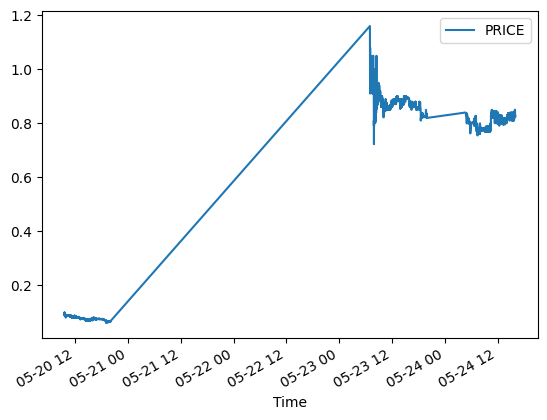

In [110]:
import matplotlib
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')

t = otp.run(trd, symbols='MKD', start=otp.dt(2022,5,20,9,30), end=otp.dt(2022,5,24,16))
t.plot(x='Time', y='PRICE')

Adding adjustment for corporate actions fixes this. The prices are adjusted to the level before or after the split depending on the value of the `adjustement_date` parameter. The next two examples illustrate this.

<AxesSubplot:xlabel='Time'>

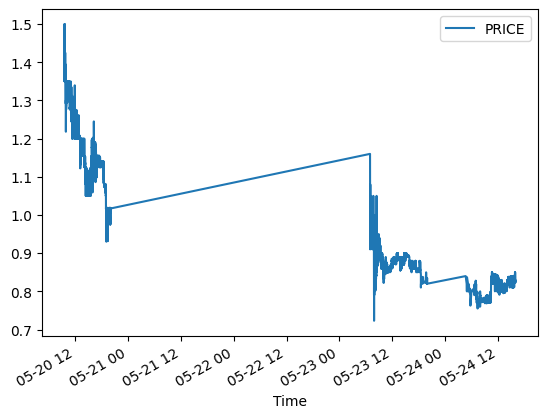

In [111]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')

trd = otp.functions.corp_actions(trd,
                                 adjustment_date=20220524,
                                 fields="PRICE")

r = otp.run(trd, symbols='MKD', start=otp.dt(2022,5,20,9,30), end=otp.dt(2022,5,24,16), symbol_date=otp.dt(2022,5,20))
r.plot(x='Time', y='PRICE')

<AxesSubplot:xlabel='Time'>

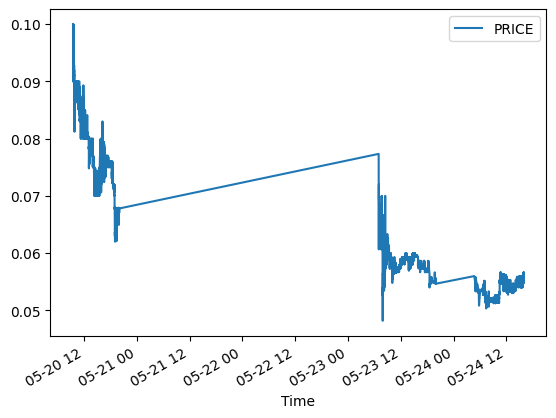

In [112]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')

trd = otp.functions.corp_actions(trd,
                                 adjustment_date=20220520,
                                 fields="PRICE")

r = otp.run(trd, symbols='MKD', start=otp.dt(2022,5,20,9,30), end=otp.dt(2022,5,24,16), symbol_date=otp.dt(2022,5,20))
r.plot(x='Time', y='PRICE')

# Retrieving Corporate actions for a symbol
We can retrieve all corporate actions for the symbols of interest.

In [115]:
cacs = otp.oqd.sources.CorporateActions()

cacs = otp.merge([cacs], symbols=['TDEQ::::MKD'], identify_input_ts=True)

otp.run(cacs, start=otp.dt(2020, 5, 1), end=otp.dt(2023, 4, 10), symbol_date=otp.dt(2022, 2, 1))

,Time,OID,ACTION_ID,ACTION_TYPE,ACTION_ADJUST,ACTION_CURRENCY,ANN_DATE,EX_DATE,PAY_DATE,REC_DATE,TERM_NOTE,TERM_RECORD_TYPE,ACTION_STATUS,SYMBOL_NAME,TICK_TYPE
0,2022-05-22 20:00:00,688935,17653162,SPLIT,14.999992,,19100101,20220523,20220523,20220523,STOCK:-0.93333330@688935,,NORMAL,TDEQ::::MKD,CACS


In [116]:
cacs = otp.oqd.sources.CorporateActions()

cacs = otp.merge([cacs], symbols=['TDEQ::::AAPL'], identify_input_ts=True)

otp.run(cacs, start=otp.dt(2020, 5, 1), end=otp.dt(2023, 4, 10), symbol_date=otp.dt(2022, 2, 1))

,Time,OID,ACTION_ID,ACTION_TYPE,ACTION_ADJUST,ACTION_CURRENCY,ANN_DATE,EX_DATE,PAY_DATE,REC_DATE,TERM_NOTE,TERM_RECORD_TYPE,ACTION_STATUS,SYMBOL_NAME,TICK_TYPE
0,2020-05-07 20:00:00,9706,16118282,CASH_DIVIDEND,0.820,USD,20200430,20200508,20200514,20200511,CASH:0.82@USD,,NORMAL,TDEQ::::AAPL,CACS
1,2020-08-06 20:00:00,9706,16330650,CASH_DIVIDEND,0.820,USD,20200730,20200807,20200813,20200810,CASH:0.82@USD,,NORMAL,TDEQ::::AAPL,CACS
2,2020-08-30 20:00:00,9706,16330651,SPLIT,0.250,,20200730,20200831,20200828,20200824,STOCK:3.00000000@9706,,NORMAL,TDEQ::::AAPL,CACS
3,2020-11-05 19:00:00,9706,16558868,CASH_DIVIDEND,0.205,USD,20201029,20201106,20201112,20201109,CASH:0.205@USD,,NORMAL,TDEQ::::AAPL,CACS
4,2021-02-04 19:00:00,9706,16799540,CASH_DIVIDEND,0.205,USD,20210127,20210205,20210211,20210208,CASH:0.205@USD,,NORMAL,TDEQ::::AAPL,CACS
5,2021-05-06 20:00:00,9706,17098817,CASH_DIVIDEND,0.220,USD,20210428,20210507,20210513,20210510,CASH:0.22@USD,,NORMAL,TDEQ::::AAPL,CACS
6,2021-08-05 20:00:00,9706,17331864,CASH_DIVIDEND,0.220,USD,20210727,20210806,20210812,20210809,CASH:0.22@USD,,NORMAL,TDEQ::::AAPL,CACS
7,2021-11-04 20:00:00,9706,17522810,CASH_DIVIDEND,0.220,USD,20211028,20211105,20211111,20211108,CASH:0.22@USD,,NORMAL,TDEQ::::AAPL,CACS
8,2022-02-03 19:00:00,9706,17597137,CASH_DIVIDEND,0.220,USD,20220127,20220204,20220210,20220207,CASH:0.22@USD,,NORMAL,TDEQ::::AAPL,CACS
9,2022-05-05 20:00:00,9706,17640491,CASH_DIVIDEND,0.230,USD,20220428,20220506,20220512,20220509,CASH:0.23@USD,,NORMAL,TDEQ::::AAPL,CACS


# Symbologies

We can query data using different symbologies.

In [117]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')
trd = trd[['PRICE','SIZE','EXCHANGE','COND']]
trd = trd.first(1)

otp.run(trd, start=otp.dt(2022,12,1,10), end=otp.dt(2022,12,1,10,15), symbol_date=otp.dt(2022, 12, 1), symbols='AAPL')

,Time,PRICE,SIZE,EXCHANGE,COND
0,2022-12-01 10:00:00.001248840,148.3,80,N,@F I


In [118]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')
trd = trd[['PRICE','SIZE','EXCHANGE','COND']]
trd = trd.first(1)

otp.run(trd, start=otp.dt(2022,12,1,10), end=otp.dt(2022,12,1,10,15), symbol_date=otp.dt(2022, 12, 1), symbols='BTKR::::AAPL US')

,Time,PRICE,SIZE,EXCHANGE,COND
0,2022-12-01 10:00:00.001248840,148.3,80,N,@F I


Examples of other supported symbologies include:

TDEQ::::AAPL

SED::::2046251

FGV::::BBG000B9XRY4

ISN::::US0378331005

TKR::::ALSPW.FRXPAR

We can create a mapping between symbologies.

In [119]:
figi = otp.Symbols('NYSE_TAQ', symbology='FGV', show_original_symbols=True, for_tick_type='TRD')
figi, _ = figi[figi['SYMBOL_NAME']!='']

otp.run(figi, start=otp.dt(2022, 12, 1), end=otp.dt(2022, 12, 2))

,Time,SYMBOL_NAME,ORIGINAL_SYMBOL_NAME
0,2022-12-01,BBG000C2V3D6,NYSE_TAQ::A
1,2022-12-01,BBG00B3T3HD3,NYSE_TAQ::AA
2,2022-12-01,BBG01B0JRCS6,NYSE_TAQ::AAA
3,2022-12-01,BBG00LPXX872,NYSE_TAQ::AAAU
4,2022-12-01,BBG00YZC2Z91,NYSE_TAQ::AAC
...,...,...,...
10652,2022-12-01,BBG00YZ2VTP7,NYSE_TAQ::ZWRK
10653,2022-12-01,BBG000H8R0N8,NYSE_TAQ::ZWS
10654,2022-12-01,BBG019XSYC89,NYSE_TAQ::ZYME
10655,2022-12-01,BBG007BBS8B7,NYSE_TAQ::ZYNE


In [120]:
btkr = otp.Symbols('NYSE_TAQ', symbology='BTKR', show_original_symbols=True, for_tick_type='TRD')
btkr, _ = btkr[btkr['SYMBOL_NAME']!='']

otp.run(btkr, start=otp.dt(2022, 12, 1), end=otp.dt(2022, 12, 2))

,Time,SYMBOL_NAME,ORIGINAL_SYMBOL_NAME
0,2022-12-01,A US,NYSE_TAQ::A
1,2022-12-01,AA US,NYSE_TAQ::AA
2,2022-12-01,AAA US,NYSE_TAQ::AAA
3,2022-12-01,AAAU US,NYSE_TAQ::AAAU
4,2022-12-01,AAC US,NYSE_TAQ::AAC
...,...,...,...
10572,2022-12-01,ZWRK US,NYSE_TAQ::ZWRK
10573,2022-12-01,ZWS US,NYSE_TAQ::ZWS
10574,2022-12-01,ZYME US,NYSE_TAQ::ZYME
10575,2022-12-01,ZYNE US,NYSE_TAQ::ZYNE


In [121]:
figi = otp.Symbols('NYSE_TAQ', symbology='FGV', show_original_symbols=True, for_tick_type='TRD')
btkr = otp.Symbols('NYSE_TAQ', symbology='BTKR', show_original_symbols=True, for_tick_type='TRD')
btkr, _ = btkr[btkr['SYMBOL_NAME']!='']
figi, _ = figi[figi['SYMBOL_NAME']!='']

mapping = otp.functions.join(figi, btkr, on=btkr['ORIGINAL_SYMBOL_NAME']==figi['ORIGINAL_SYMBOL_NAME'], how="inner")

mapping  = mapping.rename({'RIGHT_SYMBOL_NAME'   : 'BTKR',
                           'SYMBOL_NAME'         : 'FIGI',
                           'ORIGINAL_SYMBOL_NAME': 'DB_SYMBOL'})

mapping = mapping[['FIGI', 'BTKR', 'DB_SYMBOL']]

otp.run(mapping, start=otp.dt(2022, 12, 1), end=otp.dt(2022, 12, 2))

,Time,FIGI,BTKR,DB_SYMBOL
0,2022-12-01,BBG000C2V3D6,A US,NYSE_TAQ::A
1,2022-12-01,BBG00B3T3HD3,AA US,NYSE_TAQ::AA
2,2022-12-01,BBG01B0JRCS6,AAA US,NYSE_TAQ::AAA
3,2022-12-01,BBG00LPXX872,AAAU US,NYSE_TAQ::AAAU
4,2022-12-01,BBG00YZC2Z91,AAC US,NYSE_TAQ::AAC
...,...,...,...,...
10650,2022-12-01,BBG00YZ2VTP7,ZWRK US,NYSE_TAQ::ZWRK
10651,2022-12-01,BBG000H8R0N8,ZWS US,NYSE_TAQ::ZWS
10652,2022-12-01,BBG019XSYC89,ZYME US,NYSE_TAQ::ZYME
10653,2022-12-01,BBG007BBS8B7,ZYNE US,NYSE_TAQ::ZYNE


And here is an example for a non-US market

In [122]:
# 'FGV' is venue FIGI
# 'FGC' is composite FIGI
fgv = otp.Symbols('LSE', symbology='FGV', show_original_symbols=True, for_tick_type='TRD')
tkr = otp.Symbols('LSE', symbology='TKR', show_original_symbols=True, for_tick_type='TRD')

mapping = otp.functions.join(fgv, tkr, on=fgv['ORIGINAL_SYMBOL_NAME']==tkr['ORIGINAL_SYMBOL_NAME'], how="inner")

mapping, _ = mapping[mapping['SYMBOL_NAME'] != '']
mapping  = mapping.rename({'RIGHT_SYMBOL_NAME'   : 'TICKER',
                           'SYMBOL_NAME'         : 'FIGI',
                           'ORIGINAL_SYMBOL_NAME': 'DB_SYMBOL'})

mapping = mapping[['TICKER', 'FIGI', 'DB_SYMBOL']]
start = otp.dt(2022, 5, 20)
end = otp.dt(2022, 5, 25)

otp.run(mapping, start=otp.dt(2022, 12, 1), end=otp.dt(2022, 12, 2))

,Time,TICKER,FIGI,DB_SYMBOL
0,2022-12-01,020Y,BBG007XBDG85,LSE::020Y
1,2022-12-01,0A05,BBG00SYG7Q00,LSE::0A05
2,2022-12-01,0A06,BBG00NWMVZG6,LSE::0A06
3,2022-12-01,0A07,BBG00NWMW214,LSE::0A07
4,2022-12-01,0A08,BBG00NWMVL13,LSE::0A08
...,...,...,...,...
5834,2022-12-01,ZNWD,BBG00JG082G0,LSE::ZNWD
5835,2022-12-01,ZOO,BBG000DBR279,LSE::ZOO
5836,2022-12-01,ZPHR,BBG000DB8YK5,LSE::ZPHR
5837,2022-12-01,ZTF,BBG000BGXLF2,LSE::ZTF


# Symbol name changes
Symbol name changes are easy to handle with the `symbol_date` parameter of `otp.run()` which provides the "as of" date for the symbols. For example, we can pass `META` while setting `symbol_date` to any date after 2022-06-09 or `FB` and `symbol_date` before 2022-06-09.

In [123]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')
trd = trd.first(5)

otp.run(trd, start=otp.dt(2023,2,2), end=otp.dt(2023,2,3), symbols='META', symbol_date=otp.dt(2023,2,2))

,Time,EXCHANGE,COND,STOP_STOCK,SOURCE,TRF,TTE,TICKER,PRICE,DELETED_TIME,TICK_STATUS,SIZE,CORR,SEQ_NUM,TRADE_ID,PARTICIPANT_TIME,TRF_TIME,OMDSEQ
0,2023-02-02 04:00:00.011109126,K,@ TI,,N,,0,META,180.17,1969-12-31 19:00:00,0,20,0,1522,1,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,0
1,2023-02-02 04:00:00.016580344,K,@ T,,N,,0,META,181.50,1969-12-31 19:00:00,0,300,0,1538,2,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,0
2,2023-02-02 04:00:00.016639716,K,@ TI,,N,,0,META,182.70,1969-12-31 19:00:00,0,3,0,1539,3,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,1
3,2023-02-02 04:00:00.016646691,K,@ TI,,N,,0,META,182.99,1969-12-31 19:00:00,0,10,0,1540,4,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,2
4,2023-02-02 04:00:00.016650845,K,@ TI,,N,,0,META,183.00,1969-12-31 19:00:00,0,6,0,1541,5,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,3


In [124]:
trd = otp.DataSource('NYSE_TAQ', tick_type='TRD')
trd = trd.first(5)

otp.run(trd, start=otp.dt(2023,2,2), end=otp.dt(2023,2,3), symbols='FB', symbol_date=otp.dt(2021,2,2))

,Time,EXCHANGE,COND,STOP_STOCK,SOURCE,TRF,TTE,TICKER,PRICE,DELETED_TIME,TICK_STATUS,SIZE,CORR,SEQ_NUM,TRADE_ID,PARTICIPANT_TIME,TRF_TIME,OMDSEQ
0,2023-02-02 04:00:00.011109126,K,@ TI,,N,,0,META,180.17,1969-12-31 19:00:00,0,20,0,1522,1,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,0
1,2023-02-02 04:00:00.016580344,K,@ T,,N,,0,META,181.50,1969-12-31 19:00:00,0,300,0,1538,2,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,0
2,2023-02-02 04:00:00.016639716,K,@ TI,,N,,0,META,182.70,1969-12-31 19:00:00,0,3,0,1539,3,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,1
3,2023-02-02 04:00:00.016646691,K,@ TI,,N,,0,META,182.99,1969-12-31 19:00:00,0,10,0,1540,4,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,2
4,2023-02-02 04:00:00.016650845,K,@ TI,,N,,0,META,183.00,1969-12-31 19:00:00,0,6,0,1541,5,2023-02-02 04:00:00.000500,1969-12-31 19:00:00,3


# Daily OHLCV (with closing prices)

We can retrieve daily OHLCV data for specific tickers using various symbologies.

In [126]:
src = otp.oqd.sources.OHLCV(exch='USCOMP')

otp.run(src, symbols=['BTKR::::AAPL US'], start=otp.dt(2022, 10, 1), end=otp.dt(2022, 10, 7), symbol_date=otp.dt(2022, 10, 1))

,Time,OID,EXCH,CURRENCY,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2022-10-02 20:00:00,9706,USCOMP,USD,138.210,143.07,137.685,142.45,114311700.0
1,2022-10-03 20:00:00,9706,USCOMP,USD,145.030,146.22,144.260,146.10,87830060.0
2,2022-10-04 20:00:00,9706,USCOMP,USD,144.075,147.38,143.010,146.40,79470970.0
3,2022-10-05 20:00:00,9706,USCOMP,USD,145.810,147.54,145.220,145.43,68402170.0
4,2022-10-06 20:00:00,9706,USCOMP,USD,142.540,143.10,139.445,140.09,85925560.0


The most efficient way of retrieving data for a large number of symbols is via OneTick's native OID symbology. We can create a map from the databases's symbology to the OID using the code below or between any two symbologies using the method described in the Symbologies guide.

In [128]:
oid = otp.Symbols('NYSE_TAQ', symbology='OID', show_original_symbols=True)
oid, _ = oid[oid['SYMBOL_NAME']!='']

otp.run(oid, start=otp.dt(2022, 10, 1), end=otp.dt(2022, 10, 7))

,Time,SYMBOL_NAME,ORIGINAL_SYMBOL_NAME
0,2022-10-01,3751,NYSE_TAQ::A
1,2022-10-01,647321,NYSE_TAQ::AA
2,2022-10-01,695581,NYSE_TAQ::AAA
3,2022-10-01,673522,NYSE_TAQ::AAAU
4,2022-10-01,703090,NYSE_TAQ::AAC
...,...,...,...
12174,2022-10-01,273584,NYSE_TAQ::ZWS
12175,2022-10-01,704054,NYSE_TAQ::ZY
12176,2022-10-01,655470,NYSE_TAQ::ZYME
12177,2022-10-01,633589,NYSE_TAQ::ZYNE


We can now query OHLCV using OIDs. The code below retrieves OHLCV for all US equities for 5 days.

In [129]:
ohlcv = otp.oqd.sources.OHLCV(exch='USCOMP')
ohlcv['ticker'] = ohlcv.Symbol.ORIGINAL_SYMBOL_NAME
ohlcv = otp.merge([ohlcv], symbols=oid)

otp.run(ohlcv, start=otp.dt(2022, 10, 1), end=otp.dt(2022, 10, 7))

,Time,OID,EXCH,CURRENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ticker
0,2022-10-02 20:00:00,3751,USCOMP,USD,122.730,127.300,121.6800,126.3800,1343211.0,NYSE_TAQ::A
1,2022-10-02 20:00:00,647321,USCOMP,USD,34.350,37.940,34.0000,37.3900,9731361.0,NYSE_TAQ::AA
2,2022-10-02 20:00:00,695581,USCOMP,USD,24.075,24.075,24.0750,24.0750,9.0,NYSE_TAQ::AAA
3,2022-10-02 20:00:00,673522,USCOMP,USD,16.560,16.890,16.5500,16.8750,585071.0,NYSE_TAQ::AAAU
4,2022-10-02 20:00:00,703090,USCOMP,USD,9.930,9.940,9.9300,9.9400,294860.0,NYSE_TAQ::AAC
...,...,...,...,...,...,...,...,...,...,...
60740,2022-10-06 20:00:00,273584,USCOMP,USD,24.920,25.250,24.5000,24.5800,574758.0,NYSE_TAQ::ZWS
60741,2022-10-06 20:00:00,704054,USCOMP,USD,2.830,2.910,2.7500,2.7800,755683.0,NYSE_TAQ::ZY
60742,2022-10-06 20:00:00,655470,USCOMP,USD,6.060,6.170,5.7400,5.9000,1057437.0,NYSE_TAQ::ZYME
60743,2022-10-06 20:00:00,633589,USCOMP,USD,0.769,0.820,0.7411,0.7411,242326.0,NYSE_TAQ::ZYNE


# ML

see http://172.16.1.130:8000/user/narodv/lab/tree/shared/demo/ml/ML_1cell.ipynb

# How do I get to play with it?

# I just want specific analytics: e.g., market VWAP and Point-in-Time.

REST API

## I'd like to use onetick.py

In [ ]:
!pip install -U onetick.py # ask us for a link to our pip server

Simple access configuration.

Priced based on the market data that you need. We have over 200 exchanges.

Call onetick.py from your IDE / Jupyter / command line / etc.

## Where are the docs?

Getting started guides: https://docs.pip.distribution.sol.onetick.com/static/getting_started/root.html

API reference: https://docs.pip.distribution.sol.onetick.com/api/root.html

## I'm already using OneTick

In [73]:
!pip install -U onetick.py # ask us for a link to our pip server

Follow the instructions at https://docs.pip.distribution.sol.onetick.com/static/getting_started/root.html